In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import sqlite3
import json
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from path_util import data_path
from count_contributions import contributions_by_user, amount_detailed, avg_unique_auth_page_lengths
from sum_stats import sum_up_attributes

In [2]:
db_path = data_path / "data_bases" / "all_occupations.db"
con = sqlite3.connect(db_path)

df_all = pd.read_sql('SELECT occ_code, occ_group, occ_title, lenient_links, lenient_revs, lenient_lengths, women, white, african_american, asian, hispanic  FROM occupations', con)
df = df_all # make a copy

print("The number of entries:", len(df))
df.head(4)

The number of entries: 1395


,occ_code,occ_group,occ_title,lenient_links,lenient_revs,lenient_lengths,women,white,african_american,asian,hispanic
0,11-0000,major,Management Occupations,"[[""Certified Financial Manager"", ""http://en.wi...","{""Certified Financial Manager"": [{""revid"": 581...","{""Certified Financial Manager"": 2611, ""Marketi...",0.409,0.822,0.086,0.065,0.111
1,11-1000,minor,Top Executives,"[[""General manager"", ""http://en.wikipedia.org/...","{""General manager"": [{""revid"": 749862417, ""use...","{""General manager"": 7116, ""Chief executive off...",null,null,null,null,null
2,11-1010,broad,Chief Executives,"[[""Chief executive officer"", ""http://en.wikipe...","{""Chief executive officer"": [{""revid"": 6437689...","{""Chief executive officer"": 17489}",0.291,0.857,0.059,0.068,0.074
3,11-1011,detailed,Chief Executives,"[[""Chief executive officer"", ""http://en.wikipe...","{""Chief executive officer"": [{""revid"": 6437689...","{""Chief executive officer"": 17489}",0.291,0.857,0.059,0.068,0.074


In [3]:
for i in ["women", "african_american", "asian", "hispanic", "white"]:
    new_col_name = i + "_summed"
    sum_up_attributes(i, new_col_name, df)


In [4]:
df[df.occ_group == "major"].head(20)

,occ_code,occ_group,occ_title,lenient_links,lenient_revs,lenient_lengths,women,white,african_american,asian,hispanic,women_summed,african_american_summed,asian_summed,hispanic_summed,white_summed
0,11-0000,major,Management Occupations,"[[""Certified Financial Manager"", ""http://en.wi...","{""Certified Financial Manager"": [{""revid"": 581...","{""Certified Financial Manager"": 2611, ""Marketi...",0.409,0.822,0.086,0.065,0.111,0.412,0.080143,0.065571,0.111714,0.827857
73,13-0000,major,Business and Financial Operations Occupations,"[[""Loan officer"", ""http://en.wikipedia.org/?cu...","{""Loan officer"": [{""revid"": 492957605, ""user"":...","{""Loan officer"": 10956, ""Financial adviser"": 2...",0.548,0.78,0.105,0.086,0.103,0.496714,0.114429,0.092143,0.104286,0.755
129,15-0000,major,Computer and Mathematical Occupations,"[[""Information scientist"", ""http://en.wikipedi...","{""Information scientist"": [{""revid"": 329917919...","{""Information scientist"": 2757, ""Software deve...",0.262,0.654,0.085,0.233,0.083,0.305857,0.081286,0.204429,0.074143,0.684857
165,17-0000,major,Architecture and Engineering Occupations,"[[""Engineer"", ""http://en.wikipedia.org/?curid=...","{""Engineer"": [{""revid"": 194559099, ""user"": ""68...","{""Engineer"": 46284, ""Technologist"": 1755, ""Lan...",0.174,0.77,0.058,0.146,0.099,0.155,0.043333,0.152333,0.098667,0.784
226,19-0000,major,"Life, Physical, and Social Science Occupations","[[""Conservation scientist"", ""http://en.wikiped...","{""Conservation scientist"": [{""revid"": 93806143...","{""Conservation scientist"": 29473, ""Biochemist""...",0.474,0.746,0.074,0.152,0.083,0.749,0.056,0.054,0.064,0.846
305,21-0000,major,Community and Social Service Occupations,"[[""Community health worker"", ""http://en.wikipe...","{""Community health worker"": [{""revid"": 2807264...","{""Community health worker"": 37444, ""Genetic co...",0.675,0.729,0.197,0.038,0.125,0.52575,0.1815,0.03275,0.1195,0.75075
331,23-0000,major,Legal Occupations,"[[""Lawyer"", ""http://en.wikipedia.org/?curid=17...","{""Lawyer"": [{""revid"": 53322369, ""user"": ""Graem...","{""Lawyer"": 94101, ""Magistrate"": 40682, ""Law cl...",0.535,0.84,0.081,0.048,0.104,0.6135,0.083,0.049,0.1375,0.83
346,25-0000,major,Educational Instruction and Library Occupations,"[[""Library technician"", ""http://en.wikipedia.o...","{""Library technician"": [{""revid"": 230002599, ""...","{""Library technician"": 6529, ""Teacher"": 63427,...",0.737,0.815,0.099,0.056,0.108,0.799,0.071,0.037,0.037,0.867
443,27-0000,major,"Arts, Design, Entertainment, Sports, and Media...","[[""Handicraft"", ""http://en.wikipedia.org/?curi...","{""Handicraft"": [{""revid"": 90415092, ""user"": ""M...","{""Handicraft"": 15364, ""Designer"": 3819, ""Autho...",0.5,0.829,0.082,0.057,0.111,0.4618,0.0941,0.0569,0.0872,0.8148
505,29-0000,major,Healthcare Practitioners and Technical Occupat...,"[[""Veterinarian"", ""http://en.wikipedia.org/?cu...","{""Veterinarian"": [{""revid"": 355129330, ""user"":...","{""Veterinarian"": 50710, ""Psychiatrist"": 14239,...",0.743,0.756,0.12,0.095,0.094,0.724737,0.109474,0.063684,0.109105,0.795053


[1.0, 0.128, 0.694, 0.545]


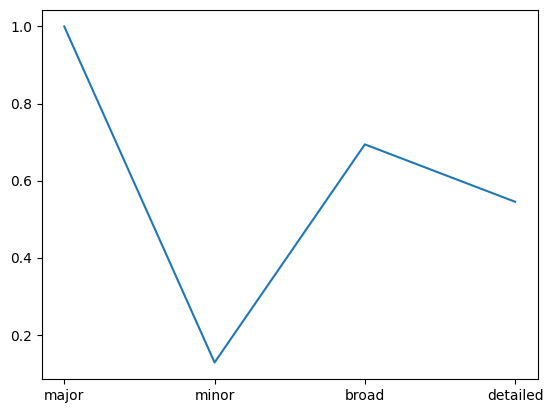

In [5]:
pct_major = round((len(df.loc[(df['occ_group'] == "major") & (df['women'] != "null")]) / 22), 3)
pct_minor = round((len(df.loc[(df['occ_group'] == "minor") & (df['women'] != "null")]) / 94), 3)
pct_broad = round((len(df.loc[(df['occ_group'] == "broad") & (df['women'] != "null")]) / 448), 3)
pct_detailed = round((len(df.loc[(df['occ_group'] == "detailed") & (df['women'] != "null")]) / 831), 3)

values = [pct_major, pct_minor, pct_broad, pct_detailed]
descriptions = ["major", "minor", "broad", "detailed"]

print(values)
plt.plot(descriptions, values)

## Deleting nulls, parsing floats

In [6]:
df = df.loc[df['women'] != "null"] # delete nulls

# fix parsing as float and rounding
for col in ["women", "white", "african_american", "asian", "hispanic"]:
    df[col] = df[col].astype(float)
    df[col] = df[col].apply(lambda x: round(x, 3))

In [7]:
df = df.dropna()
df.head(3)

,occ_code,occ_group,occ_title,lenient_links,lenient_revs,lenient_lengths,women,white,african_american,asian,hispanic,women_summed,african_american_summed,asian_summed,hispanic_summed,white_summed
0,11-0000,major,Management Occupations,"[[""Certified Financial Manager"", ""http://en.wi...","{""Certified Financial Manager"": [{""revid"": 581...","{""Certified Financial Manager"": 2611, ""Marketi...",0.409,0.822,0.086,0.065,0.111,0.412,0.080143,0.065571,0.111714,0.827857
73,13-0000,major,Business and Financial Operations Occupations,"[[""Loan officer"", ""http://en.wikipedia.org/?cu...","{""Loan officer"": [{""revid"": 492957605, ""user"":...","{""Loan officer"": 10956, ""Financial adviser"": 2...",0.548,0.780,0.105,0.086,0.103,0.496714,0.114429,0.092143,0.104286,0.755
129,15-0000,major,Computer and Mathematical Occupations,"[[""Information scientist"", ""http://en.wikipedi...","{""Information scientist"": [{""revid"": 329917919...","{""Information scientist"": 2757, ""Software deve...",0.262,0.654,0.085,0.233,0.083,0.305857,0.081286,0.204429,0.074143,0.684857


In [8]:
df_major = df.loc[df['occ_group'] == "major"]
df_major.head(3)

,occ_code,occ_group,occ_title,lenient_links,lenient_revs,lenient_lengths,women,white,african_american,asian,hispanic,women_summed,african_american_summed,asian_summed,hispanic_summed,white_summed
0,11-0000,major,Management Occupations,"[[""Certified Financial Manager"", ""http://en.wi...","{""Certified Financial Manager"": [{""revid"": 581...","{""Certified Financial Manager"": 2611, ""Marketi...",0.409,0.822,0.086,0.065,0.111,0.412,0.080143,0.065571,0.111714,0.827857
73,13-0000,major,Business and Financial Operations Occupations,"[[""Loan officer"", ""http://en.wikipedia.org/?cu...","{""Loan officer"": [{""revid"": 492957605, ""user"":...","{""Loan officer"": 10956, ""Financial adviser"": 2...",0.548,0.780,0.105,0.086,0.103,0.496714,0.114429,0.092143,0.104286,0.755
129,15-0000,major,Computer and Mathematical Occupations,"[[""Information scientist"", ""http://en.wikipedi...","{""Information scientist"": [{""revid"": 329917919...","{""Information scientist"": 2757, ""Software deve...",0.262,0.654,0.085,0.233,0.083,0.305857,0.081286,0.204429,0.074143,0.684857


In [9]:
articles_per_detailed = amount_detailed(df_all, df_major)
unique_auths, page_lengths = avg_unique_auth_page_lengths(df_major)

if "art_per_detailed" not in df_major:
    df_major.insert(4, "art_per_detailed", articles_per_detailed)

if "avg_unique_auths" not in df_major:
    df_major.insert(6, "avg_unique_auths", unique_auths)
    
if "avg_page_lengths" not in df_major:
    df_major.insert(8, "avg_page_lengths", page_lengths)
    
df_major.head(3)

,occ_code,occ_group,occ_title,lenient_links,art_per_detailed,lenient_revs,avg_unique_auths,lenient_lengths,avg_page_lengths,women,white,african_american,asian,hispanic,women_summed,african_american_summed,asian_summed,hispanic_summed,white_summed
0,11-0000,major,Management Occupations,"[[""Certified Financial Manager"", ""http://en.wi...",0.473684,"{""Certified Financial Manager"": [{""revid"": 581...",406.555556,"{""Certified Financial Manager"": 2611, ""Marketi...",16922.277778,0.409,0.822,0.086,0.065,0.111,0.412,0.080143,0.065571,0.111714,0.827857
73,13-0000,major,Business and Financial Operations Occupations,"[[""Loan officer"", ""http://en.wikipedia.org/?cu...",0.312500,"{""Loan officer"": [{""revid"": 492957605, ""user"":...",227.300000,"{""Loan officer"": 10956, ""Financial adviser"": 2...",11858.700000,0.548,0.780,0.105,0.086,0.103,0.496714,0.114429,0.092143,0.104286,0.755
129,15-0000,major,Computer and Mathematical Occupations,"[[""Information scientist"", ""http://en.wikipedi...",0.952381,"{""Information scientist"": [{""revid"": 329917919...",830.050000,"{""Information scientist"": 2757, ""Software deve...",16940.100000,0.262,0.654,0.085,0.233,0.083,0.305857,0.081286,0.204429,0.074143,0.684857


In [10]:
def viz_two_axes(df, target_variable, second_metric):
    df_viz = df.sort_values(by = [second_metric])
    df_viz.plot(kind = "bar", x = "occ_code", y = [target_variable, second_metric], 
                secondary_y = [second_metric], rot = 0)
    plt.show()
    
def viz_scatterplot_correlation(df, target_variable, second_metric):
    articles = df[second_metric].tolist()
    target = df[target_variable].tolist()
    
    corr, _ = pearsonr(target, articles)
    print('Pearsons correlation: %.3f' % corr)
    
    plt.scatter(articles, target)
    plt.show()

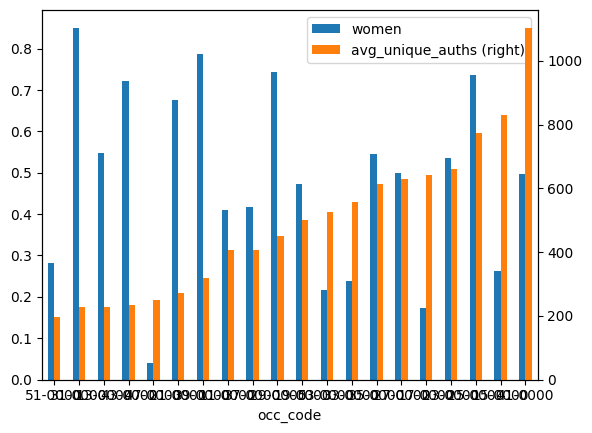

Pearsons correlation: -0.144


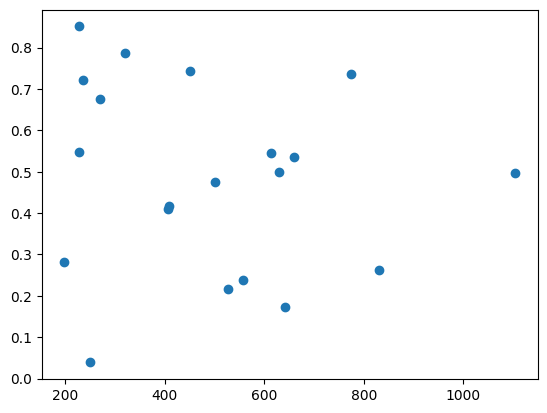

In [11]:
viz_two_axes(df_major, "women", "avg_unique_auths")

viz_scatterplot_correlation(df_major, "women", "avg_unique_auths")
